# ABOUT


Datascientest's Datascientist continuous bootcamp - cohorte Mars2022 -  AeroBOT project

**Tutor**

* Alban THUET

**Authors:**

* Hélène ASSIR
* [Ioannis STASINOPOULOS](https://www.linkedin.com/in/ioannis-stasinopoulos/)

</br>

---
</br>

**Version History**

Version | Date       | Author(s)  | Modification
--------|----------- | ---------  | --------------------------
1.0     | 30/09/2022 | H.A.       | Document creation

This notebook can be executed entirely. 

It

* mounts the GDrive of our AeroBot project @gmail account.

* loads the data from the `train_data_final.pkl` file (cf. `0_test_set_creator_DO_NOT_MODIFY_20220630.ipynb`) under a pandas DataFrame named `df`, which contains `97417` entries and 96 columns.
These data do not contain any more UAS-related entries.

* Loads the raw and pre-processed Narrative data once tokenized and stemmed ("Narrative_Raw_Stemmed_24072022_TRAIN.pkl" and "Narrative_PP_stemmed_24072022_TRAIN.pkl") (cf 03_Narr_Next preprocessing 20220721.ipynb)

* Performs Feature Engineering: one-hot-encoding of Anomaly using a naive approache, looking directly for the root label into the multiple modalities string of Anomaly

Further processing of the data should be perfomed on this dataframe, after having **copied a version of the present notebook**.

# IMPORT PACKAGES


settings for  full / patial Narrative display. Helene?


In [2]:
#######################
# Import packages
#######################
import numpy as np
import seaborn as sns
import math # for math.pi etc.
import time # time code execution

#######################
# Pandas
#######################
import pandas as pd
# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option("display.colheader_justify","left") # left-justify the print output of pandas

### Display full columnwidth
# Set pandas settings to display full text columns
#pd.options.display.max_colwidth = None
# Restore pandas settings to display standard colwidth
pd.reset_option('display.max_colwidth')

import itertools # Pour créer des iterateurs

# Package to show the progression of pandas operations
from tqdm import tqdm
# from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()
# simply use .progress_apply() instead of .apply() on your pd.DataFram

######################
# PLOTTING
######################
import matplotlib.pyplot as plt
%matplotlib inline
# # Define global plot parameters for better readability and consistency among plots
# # A complete list of the rcParams keys can be retrieved via plt.rcParams.keys() function
# plt.rcParams['axes.titlesize'] = 30
# plt.rcParams['axes.labelsize'] = 23
# plt.rcParams['xtick.labelsize'] = 23
# plt.rcParams['ytick.labelsize'] = 23
# plt.rc('legend', fontsize=23)    # legend fontsize

# BOKEH 
from bokeh.plotting import figure # Importation de la classe figure qui permet de créer un graphique bokeh.
from bokeh.io import  push_notebook, output_notebook, show
output_notebook() # permet d'afficher tous les futurs graphiques dans l'output d'une cellule jupyter. Si cette instruction n'est pas lancée, la figure s'affichera dans un nouvel onglet.
from bokeh.models import ColumnDataSource, Label
from bokeh.transform import dodge
from bokeh.models.tools import HoverTool

#####################
# NLP 
#####################
import re # for Regular Expression handling
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') # WordNet lemmatizer
nltk.download('omw-1.4') # necessary for WordNet lemmatizer
from nltk.tokenize import word_tokenize # Usual tokenizer
from nltk.tokenize import TweetTokenizer # Special tokenizer;  "we'll", "didn't", etc. are considered as one word
from sklearn.feature_extraction.text import CountVectorizer # Vectorization
from nltk.corpus import stopwords # Import stopwords from nltk.corpus
from nltk.stem.snowball import EnglishStemmer
##############################
# Undersampeling
##############################
from imblearn.under_sampling import RandomUnderSampler 
###############################
# ML preprocessing and models
###############################
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble # random forest
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix


###############################
# Other
###############################
import pickle as pkl # Saving data externally

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# LOAD DATA

## Mount GDrive

In [3]:
#@title
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

#check your present working directory 
%pwd

Mounted at /content/drive/


'/content'

In [4]:
#@title
# move to the transformed data location (you can create a deeper structure, if needed, e.g. to save a trained model):
%cd /content/drive/MyDrive/data/transformed/

/content/drive/MyDrive/data/transformed


In [5]:
#@title
!ls # list the content of the pwd

#!ls "/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/" # list contect of a speficic folder

 complaints-2022-08-05_13_55.csv
'Copy of Qualified abbreviations_20220718.xlsx.gsheet'
'Data Dictionnary.xlsx'
 data_for_BERT_multilabel_20220805.pkl
 df_for_Anomaly_prediction.pkl
 df_test_for_Anomaly_prediction.pkl
 model.png
 model_results
 Narrative_PP_stemmed_24072022_TRAIN.pkl
 Narrative_Raw_Stemmed_24072022_TRAIN.pkl
 Narrative_RegEx_subst_21072022_TRAIN.pkl
'Qualified abbreviations_20220707_test.csv'
'Qualified abbreviations_20220708.csv'
'Qualified abbreviations_20220718.csv'
'Qualified abbreviations_20220718_Google_sheet.gsheet'
 STREAMLIT_demo_data
 test_data_final.pkl
 train_data_final.pkl


## Load data from .pkl file


In [6]:
# Load the TRAIN data (97417 entries)
# Do not touch the TEST data until the end of the project!
# or the curse of the greek gods will fall upon you!

%cd /content/drive/MyDrive/data/transformed/
with open("df_for_Anomaly_prediction.pkl", "rb") as f:
    loaded_data = pkl.load(f)

df = loaded_data
print("\nA Dataframe with", len(df), "entries has been loaded")

/content/drive/MyDrive/data/transformed

A Dataframe with 96986 entries has been loaded


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96986 entries, 1163382 to 874642
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Narrative                                     96986 non-null  object
 1   Anomaly                                       96986 non-null  object
 2   Narrative_PP_stemmed                          96986 non-null  object
 3   Narrative_Raw_Stemmed                         96986 non-null  object
 4   Narrative_Raw_Stemmed_str                     96986 non-null  object
 5   Narrative_PP_stemmed_str                      96986 non-null  object
 6   Anomaly_Deviation / Discrepancy - Procedural  96986 non-null  int64 
 7   Anomaly_Aircraft Equipment                    96986 non-null  int64 
 8   Anomaly_Conflict                              96986 non-null  int64 
 9   Anomaly_Inflight Event / Encounter            96986 non-null  int

## Define Anomaly_RootLabels_columns list from data set

In [8]:
# Retriece the list of Anomaly label columns
Anomaly_RootLabels_columns = []

for col in df.columns:
  if 'Anomaly_' in str(col):
      Anomaly_RootLabels_columns.append(col)

In [9]:
Anomaly_RootLabels_columns

['Anomaly_Deviation / Discrepancy - Procedural',
 'Anomaly_Aircraft Equipment',
 'Anomaly_Conflict',
 'Anomaly_Inflight Event / Encounter',
 'Anomaly_ATC Issue',
 'Anomaly_Deviation - Altitude',
 'Anomaly_Deviation - Track / Heading',
 'Anomaly_Ground Event / Encounter',
 'Anomaly_Flight Deck / Cabin / Aircraft Event',
 'Anomaly_Ground Incursion',
 'Anomaly_Airspace Violation',
 'Anomaly_Deviation - Speed',
 'Anomaly_Ground Excursion',
 'Anomaly_No Specific Anomaly Occurred']

# ANOMALY FEATURES EXPLORATION

## Number of anomalies per report

In [10]:
df['Nbr_Anomalies']=df[Anomaly_RootLabels_columns].sum(axis=1)

In [11]:
df_to_plot=pd.DataFrame(df.groupby(['Nbr_Anomalies']).size()).rename(columns={0:'Nbr_reports'})

In [12]:
df_to_plot

,Nbr_reports
Nbr_Anomalies,
0,2438
1,29382
2,40216
3,18240
4,5532
5,1045
6,122
7,11


In [13]:
df_to_plot['Nbr_reports'].sum(axis=0)

96986

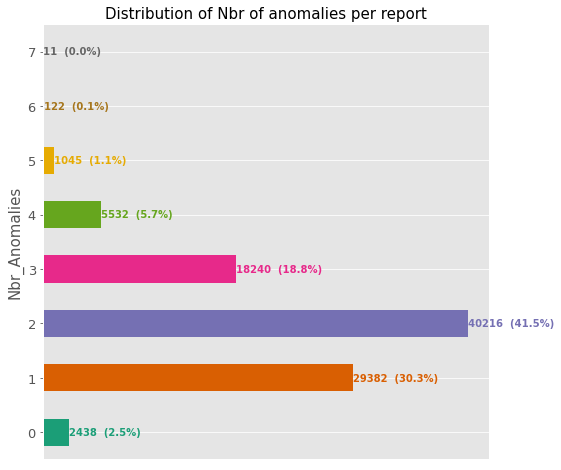

In [14]:
# Plot
fig = plt.figure()
plt.style.use('ggplot')
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 13
plt.rc('legend', fontsize=10)    # legend fontsize
total_reports=df_to_plot['Nbr_reports'].sum(axis=0)
num_classes=len(df_to_plot)
colors=plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)
df_to_plot['Nbr_reports'].plot.barh(title='Distribution of Nbr of anomalies per report', 
                                                color=colors,
                                                figsize=(8,8))
#plt.xlim([0,1])
plt.xticks([])
for i, v in enumerate(df_to_plot['Nbr_reports']):
  c = next(iter_color)
  plt.text(v, i,            
          str(v)+"  ("+str(round(v/total_reports*100,1))+"%)", 
          color=c, 
          va='center', 
          fontweight='bold')


In [15]:
df[df['Nbr_Anomalies']==0].head()


,Narrative,Anomaly,Narrative_PP_stemmed,Narrative_Raw_Stemmed,Narrative_Raw_Stemmed_str,Narrative_PP_stemmed_str,Anomaly_Deviation / Discrepancy - Procedural,Anomaly_Aircraft Equipment,Anomaly_Conflict,Anomaly_Inflight Event / Encounter,Anomaly_ATC Issue,Anomaly_Deviation - Altitude,Anomaly_Deviation - Track / Heading,Anomaly_Ground Event / Encounter,Anomaly_Flight Deck / Cabin / Aircraft Event,Anomaly_Ground Incursion,Anomaly_Airspace Violation,Anomaly_Deviation - Speed,Anomaly_Ground Excursion,Anomaly_No Specific Anomaly Occurred,Nbr_Anomalies
ACN,,,,,,,,,,,,,,,,,,,,,
992760,This report is meant to advise the Charlotte A...,Other Unwanted situation,"[report, meant, advis, charlott, airport, taxi...","[report, meant, advis, charlott, airport, taxi...",report meant advis charlott airport taxiway ap...,report meant advis charlott airport taxiway ap...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
990224,I had been awake for a period of 40 hours and ...,Other fatigue,"[awak, period, 40, hour, given, reserv, assign...","[awak, period, 40, hour, given, reserv, assign...",awak period 40 hour given reserv assign 2 fli ...,awak period 40 hour given reserv assign 2 ante...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1757152,Subject of chronic and acute fatigue. Chronic:...,Other Fatigue,"[subject, chronic, acut, fatigu, chronic, :, w...","[subject, chronic, acut, fatigu, chronic, :, w...",subject chronic acut fatigu chronic : work 10 ...,subject chronic acut fatigu chronic : work 10 ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1190897,In an effort to improve aviation safety I am r...,Other Unwanted situation,"[effort, improv, aviat, safeti, request, weath...","[effort, improv, aviat, safeti, request, weath...",effort improv aviat safeti request weather rep...,effort improv aviat safeti request weather rep...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
926068,Flight management needs to be aware of the sit...,Other Unwanted Situation,"[flight, manag, need, awar, situat, go, tlpl, ...","[flight, manag, need, awar, situat, go, tlpl, ...",flight manag need awar situat go tlpl ndb appr...,flight manag need awar situat go tlpl ndb appr...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:

### Display full columnwidth
# Set pandas settings to display full text columns
pd.options.display.max_colwidth = None

display(df[df['Anomaly_Deviation - Speed']==1][['Narrative']].head(50))
# Restore pandas settings to display standard colwidth
pd.reset_option('display.max_colwidth')

,Narrative
ACN,
1562400,On takeoff from 13R; the F/O (First Officer) was flying and commanded 'Gear Up'. Without recognition of my actions; as I was Pilot Monitoring; his first takeoff of our trip; I put the flap lever from Flaps 1 to Flaps Up. Immediately after this action; the F/O commanded LNAV as he had missed engaging it during his departure brief; and I missed it during my pre-departure cleanup of the MCP (Mode Control Panel). As I selected LNAV for him we got an 'Airspeed Low' aural warning. I immediately looked at the airspeed indicator and saw 155 with a yellow box around it. I told the F/O; Pilot Flying our airspeed was low and to accelerate; but did not recognize my error until we reached 1000 feet AGL and I went to put the flaps up. It was then I recognized the flaps were up and the gear was down. I raised the gear; the aircraft accelerated and the rest of the flight was uneventful.
1405273,I was the PM on a visual approach backed up by the ILS to [destination]. The PF was high and fast and was unable to get stabilized passing through approximately 1000 feet. I was already concerned we were not going to get stabilized earlier on the approach. We were unable [to] mitigate our excess energy during the approach. The aircraft ahead of us called a 20 kt shear at 800 feet. Passing through 1000 feet and struggling to get established we in fact did encounter the 20 kt shear which pushed us well above our 30 flap speed; resulting in the flaps blowing up to 25 as advertised. There was a couple seconds where we thought about transitioning to a 25 flap approach. I positioned the flaps to 25 and then said 'lets go around and try this again'. The PF said 'going around flaps 20' and we executed a missed approach I believe at approximately 700 or 800 feet. At the positive rate gear up point I reached over and positioned the gear handle to up and the gear retracted normally and then we got two EICAS caution messages. The first was LE (Leading Edge) slat disagree followed by a TE (Trailing Edge) flap disagree caution message. I told the PF he had the aircraft and ATC and I got into the QRH and ran the appropriate checklist which basically had us match the flap handle with our current flap position and select LE and TE ALTN switches to ALTN and select 20 flaps. It was clear the flaps were not moving from the flaps 20 position and we had a landable configuration. Due to the short runway and current wind conditions at [destination] (080-20G30) and our fuel state we elected to divert to [an alternate] with a long runway and relatively calm winds. All checklists were completed and we diverted with no additional complications. I [advised] ATC and requested a vector direct. Our fuel at landing was 5K lbs. Maintenance reset the flaps and ran their appropriate checklist; we took off and landed at [original destination] 3 hours late uneventfully.
1105201,We were dispatched with the right air conditioning pack inoperative under normal MEL procedures. Due to weather along the SCOTT Arrival; we were being vectored south along the west coast of southern Florida and had been given a clearance to descend to 8;000 and to proceed direct to CARNU to join the CURSO 2 RNAV Arrival. Passing through approximately 13;000 feet at 280 knots with the throttles at idle I looked up to see that the left air conditioning pack had failed - 'INOP' and 'PACK OFF' lights in the pack switch were both illuminated. There were no EICAS messages displayed to correspond with the pack shutdown indications; but the cabin altitude was climbing rapidly and it was clear that the pack was indeed off. I immediately declared an emergency with Miami Center and increased the rate of descent in order to get below 10;000 before the cabin altitude rose to meet the aircraft altitude. In doing so; I exceeded 250 knots below 10;000 for a few minutes; slowing once we leveled off at our cleared altitude of 8;000.We had difficulty locating the proper QRH checklist - the PACK OFF checklist ga

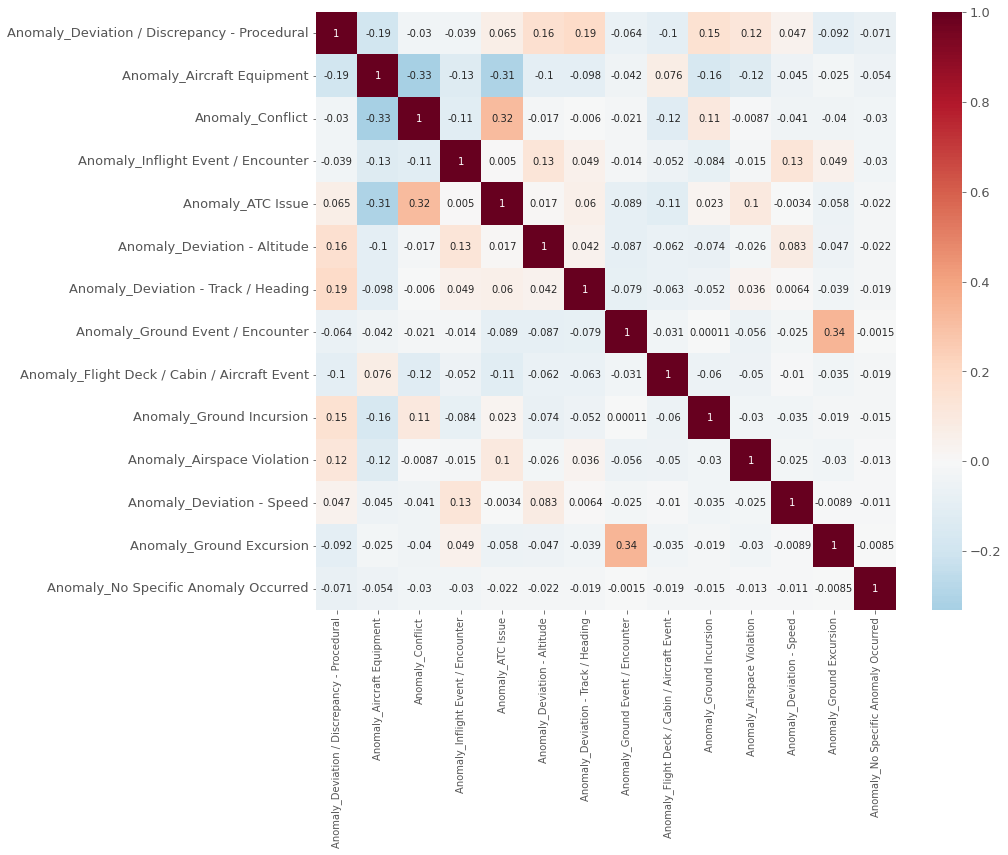

In [ ]:
# Correlation heatmap
plt.figure(figsize=(13, 11))
sns.heatmap(df[Anomaly_RootLabels_columns].corr(), annot=True, cmap='RdBu_r', center=0);

In [ ]:
one_hots = df[Anomaly_RootLabels_columns] # DataFrame containing the one-hot representation of Anomaly labels
percentages = []

# Calculate the total number of occurrences of each anomaly 
effectif = one_hots.sum(axis = 0)
effectif = effectif / len(one_hots) # normalize the data wrt to the total # of samples
percentages.append(effectif)

# Loop through the anomalies
for i, anomaly in enumerate(Anomaly_RootLabels_columns):

  # Count how many times each anomaly occurs, given the occurence of 'anomaly'
  effectif = one_hots[one_hots[anomaly] == 1].sum(axis = 0)
  effectif = effectif / effectif[i] # normalize the data by the counts of the selected anomaly
  percentages.append(effectif)


# Create a list of titles for the DataFrame to be created
titles = ['TOTAL']
titles += Anomaly_RootLabels_columns

percentages = pd.DataFrame(percentages, index = titles)

In [ ]:
np.round(percentages,3)*100

,Anomaly_Deviation / Discrepancy - Procedural,Anomaly_Aircraft Equipment,Anomaly_Conflict,Anomaly_Inflight Event / Encounter,Anomaly_ATC Issue,Anomaly_Deviation - Altitude,Anomaly_Deviation - Track / Heading,Anomaly_Ground Event / Encounter,Anomaly_Flight Deck / Cabin / Aircraft Event,Anomaly_Ground Incursion,Anomaly_Airspace Violation,Anomaly_Deviation - Speed,Anomaly_Ground Excursion,Anomaly_No Specific Anomaly Occurred
TOTAL,60.1,39.1,17.9,17.7,16.2,9.2,8.5,7.6,7.4,5.4,4.1,2.7,2.2,0.5
Anomaly_Deviation / Discrepancy - Procedural,100.0,31.7,17.0,16.5,18.2,12.9,12.9,6.2,5.3,8.1,6.0,3.3,1.1,0.1
Anomaly_Aircraft Equipment,48.8,100.0,2.1,11.7,2.1,5.5,5.1,6.2,9.8,0.8,1.1,1.8,1.8,0.0
Anomaly_Conflict,57.0,4.5,100.0,8.9,41.3,8.1,8.2,6.4,0.7,10.6,3.7,1.3,1.0,0.0
Anomaly_Inflight Event / Encounter,56.1,25.9,9.0,100.0,16.6,17.3,11.5,6.8,4.4,1.3,3.5,7.2,3.8,0.0
Anomaly_ATC Issue,67.4,5.1,45.6,18.2,100.0,10.2,12.3,2.2,0.7,6.6,8.6,2.5,0.3,0.1
Anomaly_Deviation - Altitude,84.6,23.6,15.9,33.6,18.2,100.0,12.2,0.3,2.2,0.1,2.5,6.9,0.0,0.0
Anomaly_Deviation - Track / Heading,90.6,23.4,17.2,23.9,23.5,13.1,100.0,0.8,1.9,1.6,6.5,3.0,0.3,0.0
Anomaly_Ground Event / Encounter,49.3,32.0,15.1,15.9,4.8,0.4,0.9,100.0,4.6,5.4,0.2,1.3,19.9,0.4
Anomaly_Flight Deck / Cabin / Aircraft Event,42.9,52.2,1.8,10.7,1.7,2.8,2.3,4.7,100.0,0.6,0.6,2.1,0.4,0.0
